# General Setup

## Install Libraries

In [54]:
#! pip install numpy matplotlib scikit-learn pandas

## Import Libraries

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_circles, make_moons, load_iris, load_breast_cancer, make_classification, load_wine
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy.signal import sawtooth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To avoid repetitive code, we'll define a helper function to plot the decision boundaries for our models.

In [9]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()

# Part 1: Basic SVM

## Create Fake Data

In [13]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

## Train.Test.spilit

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Creation

In [15]:
model_linear = SVC(kernel='linear')

model_linear.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Model Prediction

In [16]:
y_pred = model_linear.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


## Plot Decision Boundary

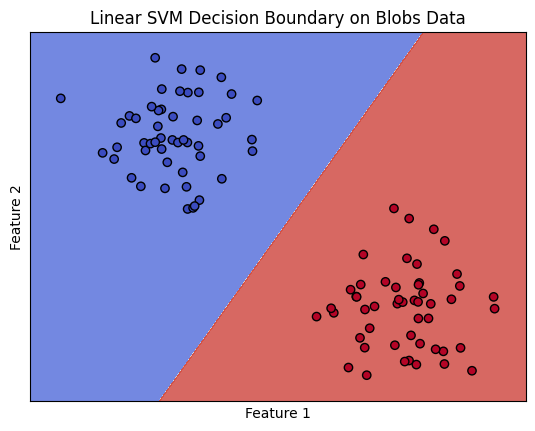

In [17]:
plot_decision_boundary(model_linear, X, y, "Linear SVM Decision Boundary on Blobs Data")

### Challenge: When Linear Fails

In [18]:
X_circles, y_circles = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

In [19]:
model_linear_circles = SVC(kernel='linear')
model_linear_circles.fit(X_train_c, y_train_c)

y_pred_c = model_linear_circles.predict(X_test_c)
accuracy_c = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy on Circles Data: {accuracy_c:.2f}")

Accuracy on Circles Data: 0.33


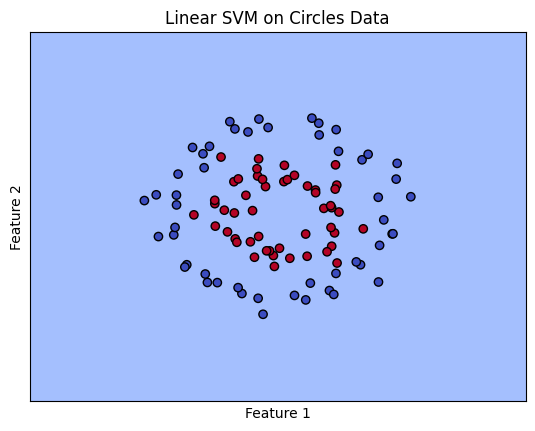

In [20]:
plot_decision_boundary(model_linear_circles, X_circles, y_circles, "Linear SVM on Circles Data")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

سوال اول: چرا الان جداساز خطی جواب نمیده؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

خوب واضحا اینجا داده ها کاملا در هم هستند و با هیچ مدل خطی جدا پذیر نیستند.
</div>

### Challenge 2

In [22]:
X_moon, y_moon = make_moons(n_samples=100, noise=0.2, random_state=42) 

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_moon, y_moon, test_size=0.3, random_state=42)

In [23]:
model_linear_moon = SVC(kernel='linear')
model_linear_moon.fit(X_train_c, y_train_c)

y_pred_c = model_linear_moon.predict(X_test_c)
accuracy_c = accuracy_score(y_test_c, y_pred_c)
print(f"Accuracy on Circles Data: {accuracy_c:.2f}")

Accuracy on Circles Data: 0.87


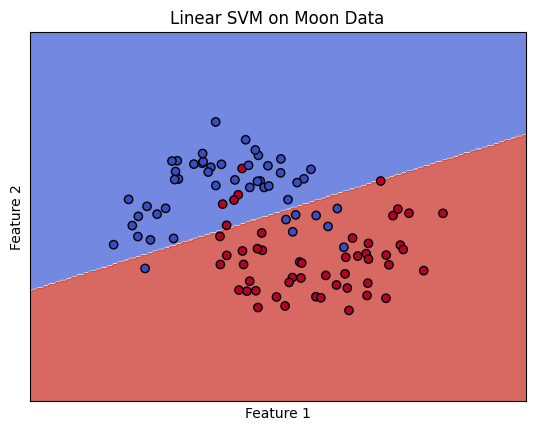

In [24]:
plot_decision_boundary(model_linear_moon, X_moon, y_moon, "Linear SVM on Moon Data")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## به نظرت چه جداسازی برای این کد مناسب تره؟ چرا؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

**Linear SVM** فقط می‌تواند **خط مستقیم** به عنوان decision boundary رسم کند، در حالی که:

- **Moon Data**: الگوی کلی خطی دارد (چپ-بالا vs راست-پایین) → خط مستقیم تا حدودی قابل قبول
- **Circle Data**: الگوی شعاعی دارد (داخل دایره vs خارج دایره) → خط مستقیم هیچ‌گاه نمی‌تواند جدا کند

### راه حل: استفاده از Kernel SVM

**RBF Kernel** می‌تواند boundary های منحنی و پیچیده ایجاد کند.

## فرمول‌ها:

### Linear SVM:
```
K(xi, xj) = xi · xj
Decision: f(x) = w · x + b
→ همیشه خط مستقیم
```

### RBF Kernel SVM:
```
K(xi, xj) = exp(-γ ||xi - xj||²)
Decision: f(x) = Σ αi yi exp(-γ ||xi - x||²) + b  
→ boundary منحنی و انعطاف‌پذیر
```

**نتیجه:** RBF kernel با تصمیم‌گیری محلی، می‌تواند الگوهای پیچیده moon و circle را به خوبی طبقه‌بندی کند.
</div>

# Part 2: Play with Kernels

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

# Keep only class 1 and 2
X = X[y != 0, :2]
y = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train and Compare Kernels

### Create models with different kernels

In [26]:
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')
poly_svm = SVC(kernel='poly', degree=3)

### Train models

In [27]:
linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)
poly_svm.fit(X_train, y_train)

acc_linear = accuracy_score(y_test, linear_svm.predict(X_test))
acc_rbf = accuracy_score(y_test, rbf_svm.predict(X_test))
acc_poly = accuracy_score(y_test, poly_svm.predict(X_test))

print(f"Accuracy (Linear Kernel): {acc_linear:.2f}")
print(f"Accuracy (RBF Kernel): {acc_rbf:.2f}")
print(f"Accuracy (Poly Kernel): {acc_poly:.2f}")

Accuracy (Linear Kernel): 0.70
Accuracy (RBF Kernel): 0.63
Accuracy (Poly Kernel): 0.70


### Plot decision boundaries

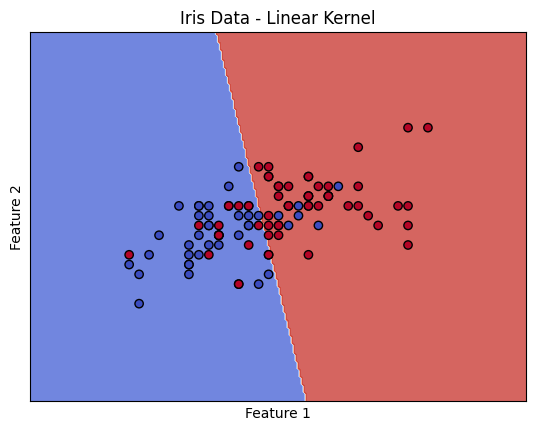

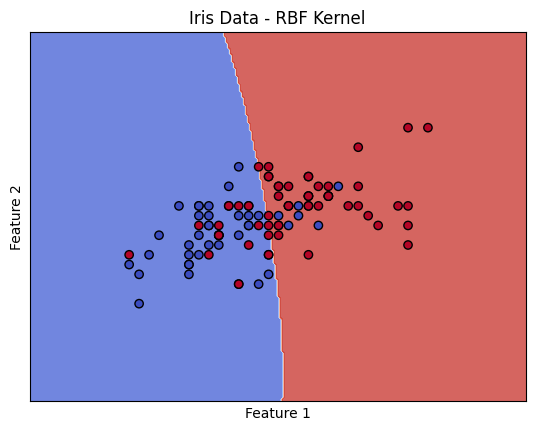

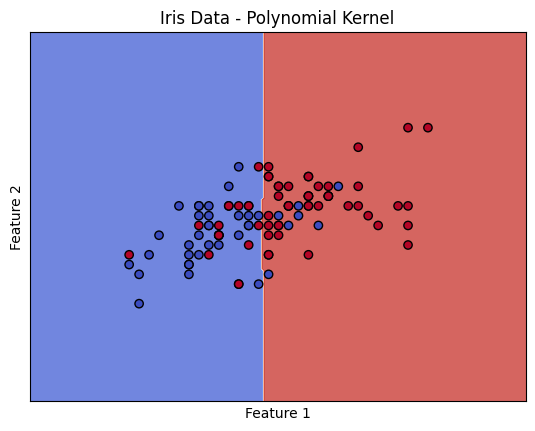

In [28]:
plot_decision_boundary(linear_svm, X, y, "Iris Data - Linear Kernel")
plot_decision_boundary(rbf_svm, X, y, "Iris Data - RBF Kernel")
plot_decision_boundary(poly_svm, X, y, "Iris Data - Polynomial Kernel")

### Challenge: Breast Cancer Dataset

In [30]:
cancer = load_breast_cancer()
X = cancer.data[:, 4:6]
y = cancer.target

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train models

In [31]:
linear_svm_bc = SVC(kernel='linear').fit(X_train_bc, y_train_bc)
rbf_svm_bc = SVC(kernel='rbf').fit(X_train_bc, y_train_bc)
poly_svm_bc = SVC(kernel='poly', degree=3).fit(X_train_bc, y_train_bc)

### Evaluate and print accuracies

In [32]:
acc_linear_bc = accuracy_score(y_test_bc, linear_svm_bc.predict(X_test_bc))
acc_rbf_bc = accuracy_score(y_test_bc, rbf_svm_bc.predict(X_test_bc))
acc_poly_bc = accuracy_score(y_test_bc, poly_svm_bc.predict(X_test_bc))

print(f"Breast Cancer Accuracy (Linear Kernel): {acc_linear_bc:.2f}")
print(f"Breast Cancer Accuracy (RBF Kernel): {acc_rbf_bc:.2f}")
print(f"Breast Cancer Accuracy (Poly Kernel): {acc_poly_bc:.2f}")

Breast Cancer Accuracy (Linear Kernel): 0.68
Breast Cancer Accuracy (RBF Kernel): 0.83
Breast Cancer Accuracy (Poly Kernel): 0.81


# Plot decision boundaries


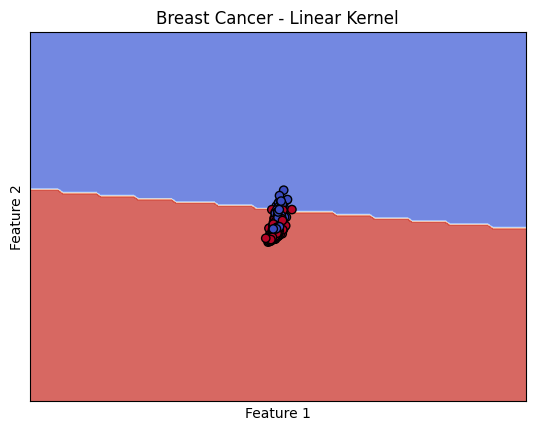

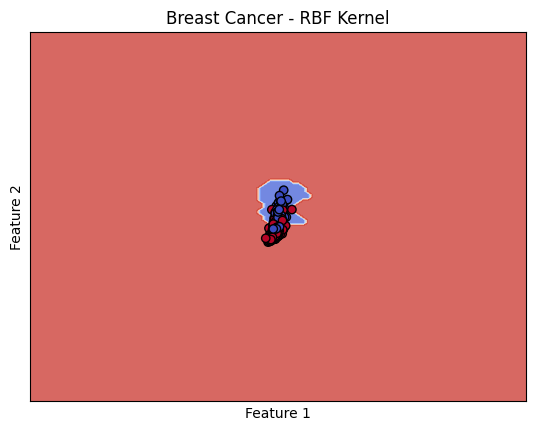

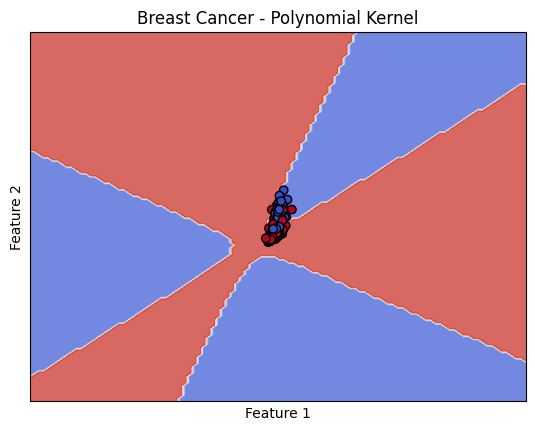

In [33]:
plot_decision_boundary(linear_svm_bc, X, y, "Breast Cancer - Linear Kernel")
plot_decision_boundary(rbf_svm_bc, X, y, "Breast Cancer - RBF Kernel")
plot_decision_boundary(poly_svm_bc, X, y, "Breast Cancer - Polynomial Kernel")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## توضیح بده کدوم کرنل و چرا بهتر شد؟ هرکدوم از این فیچرها چه چیزی رو نشون میدن؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

### **عملکرد مدل‌ها:**
- **Linear SVM**: 0.68 (68%) - ضعیف
- **RBF SVM**: 0.83 (83%) - بهترین
- **Polynomial SVM**: 0.81 (81%) - خوب

## **چرا RBF بهترین بود؟**

### ۱. **تحلیل Decision Boundaries:**

**Linear Kernel:**
- یک خط مستقیم رسم کرد
- **مشکل**: دیتا کاملاً خطی نیست! تمام نقاط در یک cluster متمرکزند
- نمی‌تونه پیچیدگی دیتا رو capture کنه

**RBF Kernel:**
- یک boundary منحنی و محلی ساخت
- دقیقاً دور cluster اصلی یک "bubble" کشیده
- **مزیت**: تصمیم‌گیری محلی → بهتر نقاط نزدیک رو جدا می‌کنه

**Polynomial Kernel:**
- boundary پیچیده‌ای ساخت (شبیه X)
- ولی **over-complex** شده → ممکن است overfitting

### ۲. **معنای Features:**

```python
Feature 1 (mean smoothness): صافی سطح تومور
Feature 2 (mean compactness): فشردگی/چگالی تومور

# فرضیه پزشکی:
- تومورهای بدخیم: معمولاً ناصاف‌تر و کم‌فشرده‌تر
- تومورهای خوش‌خیم: صاف‌تر و فشرده‌تر
```

### ۳. **چرا Linear ضعیف بود؟**

از روی نمودار مشخصه که:
```
- دو کلاس در یک منطقه متمرکز هستند (نه جدا)
- رابطه خطی واضح بین features وجود نداره
- نیاز به boundary پیچیده‌تر داریم
```

### ۴. **چرا RBF از Polynomial بهتر بود؟**

**مشکل Polynomial:**
- خیلی پیچیده شده (X shape)
- احتمال overfitting
- برای این دیتای کوچک زیادی complex

**مزیت RBF:**
- انعطاف مناسب
- تنظیم آسان‌تر
- کمتر overfitting می‌کنه
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## کدام کرنل بهترین عملکرد را داشت؟ چرا؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

### **کرنل با بهترین عملکرد: RBF Kernel**

**نتایج عملکرد:**
- RBF Kernel: **83%** (بهترین)
- Polynomial Kernel: 81%
- Linear Kernel: 68% (ضعیف‌ترین)

### **دلایل برتری RBF Kernel:**

#### **۱. انطباق با ساختار دیتا:**
- دیتای breast cancer **غیرخطی** است و نقاط در یک cluster متمرکز هستند
- RBF با **تصمیم‌گیری محلی** می‌تواند این الگوی پیچیده را بهتر تشخیص دهد
- Linear kernel نمی‌تواند این پیچیدگی را capture کند

#### **۲. مزایای فرمولی RBF:**
```
K(xi, xj) = exp(-γ ||xi - xj||²)
```
- **تأثیر محلی**: هر support vector تنها روی نقاط نزدیک تأثیر می‌گذارد  
- **انعطاف بالا**: می‌تواند boundary های منحنی و پیچیده بسازد
- **کنترل آسان**: تنها با پارامتر γ قابل تنظیم است

#### **۳. مقایسه با سایر کرنل‌ها:**

**مشکل Linear Kernel:**
- تنها خط مستقیم رسم می‌کند
- برای دیتای غیرخطی breast cancer نامناسب
- عملکرد ضعیف (68%)

**مشکل Polynomial Kernel:**  
- boundary خیلی پیچیده (X شکل) → احتمال overfitting
- برای دیتای کوچک زیادی complex
- نیاز به تنظیم دقیق degree و پارامترها

**مزایای RBF:**
- تعادل مناسب بین انعطاف و سادگی  
- کمتر دچار overfitting می‌شود

</div>

In [126]:
cancer = load_breast_cancer()

feature_sets = {
    '2 Features': [4, 5],           # smoothness, compactness
    '4 Features': [0, 1, 2, 3],     # radius, texture, perimeter, area
    '10 Features': list(range(10)), 
    '20 Features': list(range(20)),
    '30 Features': list(range(30))  # All features
}

In [128]:
results = {}

for set_name, feature_indices in feature_sets.items():
    print(f"\nTesting {set_name}:")
    print("-" * 30)
    
    # Select features
    X = cancer.data[:, feature_indices]
    y = cancer.target
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Test different kernels
    models = {
        'Linear': SVC(kernel='linear', random_state=42),
        'RBF': SVC(kernel='rbf', random_state=42),
        'Polynomial': SVC(kernel='poly', degree=3, random_state=42)
    }
    
    set_results = {}
    
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        set_results[model_name] = accuracy
        print(f"  {model_name:12}: {accuracy:.3f} ({accuracy*100:.1f}%)")
    
    # Find best model
    best_model = max(set_results, key=set_results.get)
    best_accuracy = set_results[best_model]
    print(f"Best: {best_model} ({best_accuracy:.3f})")
    
    results[set_name] = set_results



Testing 2 Features:
------------------------------
  Linear      : 0.830 (83.0%)
  RBF         : 0.819 (81.9%)
  Polynomial  : 0.749 (74.9%)
Best: Linear (0.830)

Testing 4 Features:
------------------------------
  Linear      : 0.918 (91.8%)
  RBF         : 0.912 (91.2%)
  Polynomial  : 0.836 (83.6%)
Best: Linear (0.918)

Testing 10 Features:
------------------------------
  Linear      : 0.942 (94.2%)
  RBF         : 0.965 (96.5%)
  Polynomial  : 0.906 (90.6%)
Best: RBF (0.965)

Testing 20 Features:
------------------------------
  Linear      : 0.953 (95.3%)
  RBF         : 0.959 (95.9%)
  Polynomial  : 0.877 (87.7%)
Best: RBF (0.959)

Testing 30 Features:
------------------------------
  Linear      : 0.977 (97.7%)
  RBF         : 0.977 (97.7%)
  Polynomial  : 0.895 (89.5%)
Best: Linear (0.977)



Creating decision boundaries for 2 Features (4-5)...

Creating decision boundaries for 4 Features (0-3)...

Creating decision boundaries for 10 Features (0-9)...


C:\Users\The_Death\AppData\Local\Temp\ipykernel_600\516230840.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


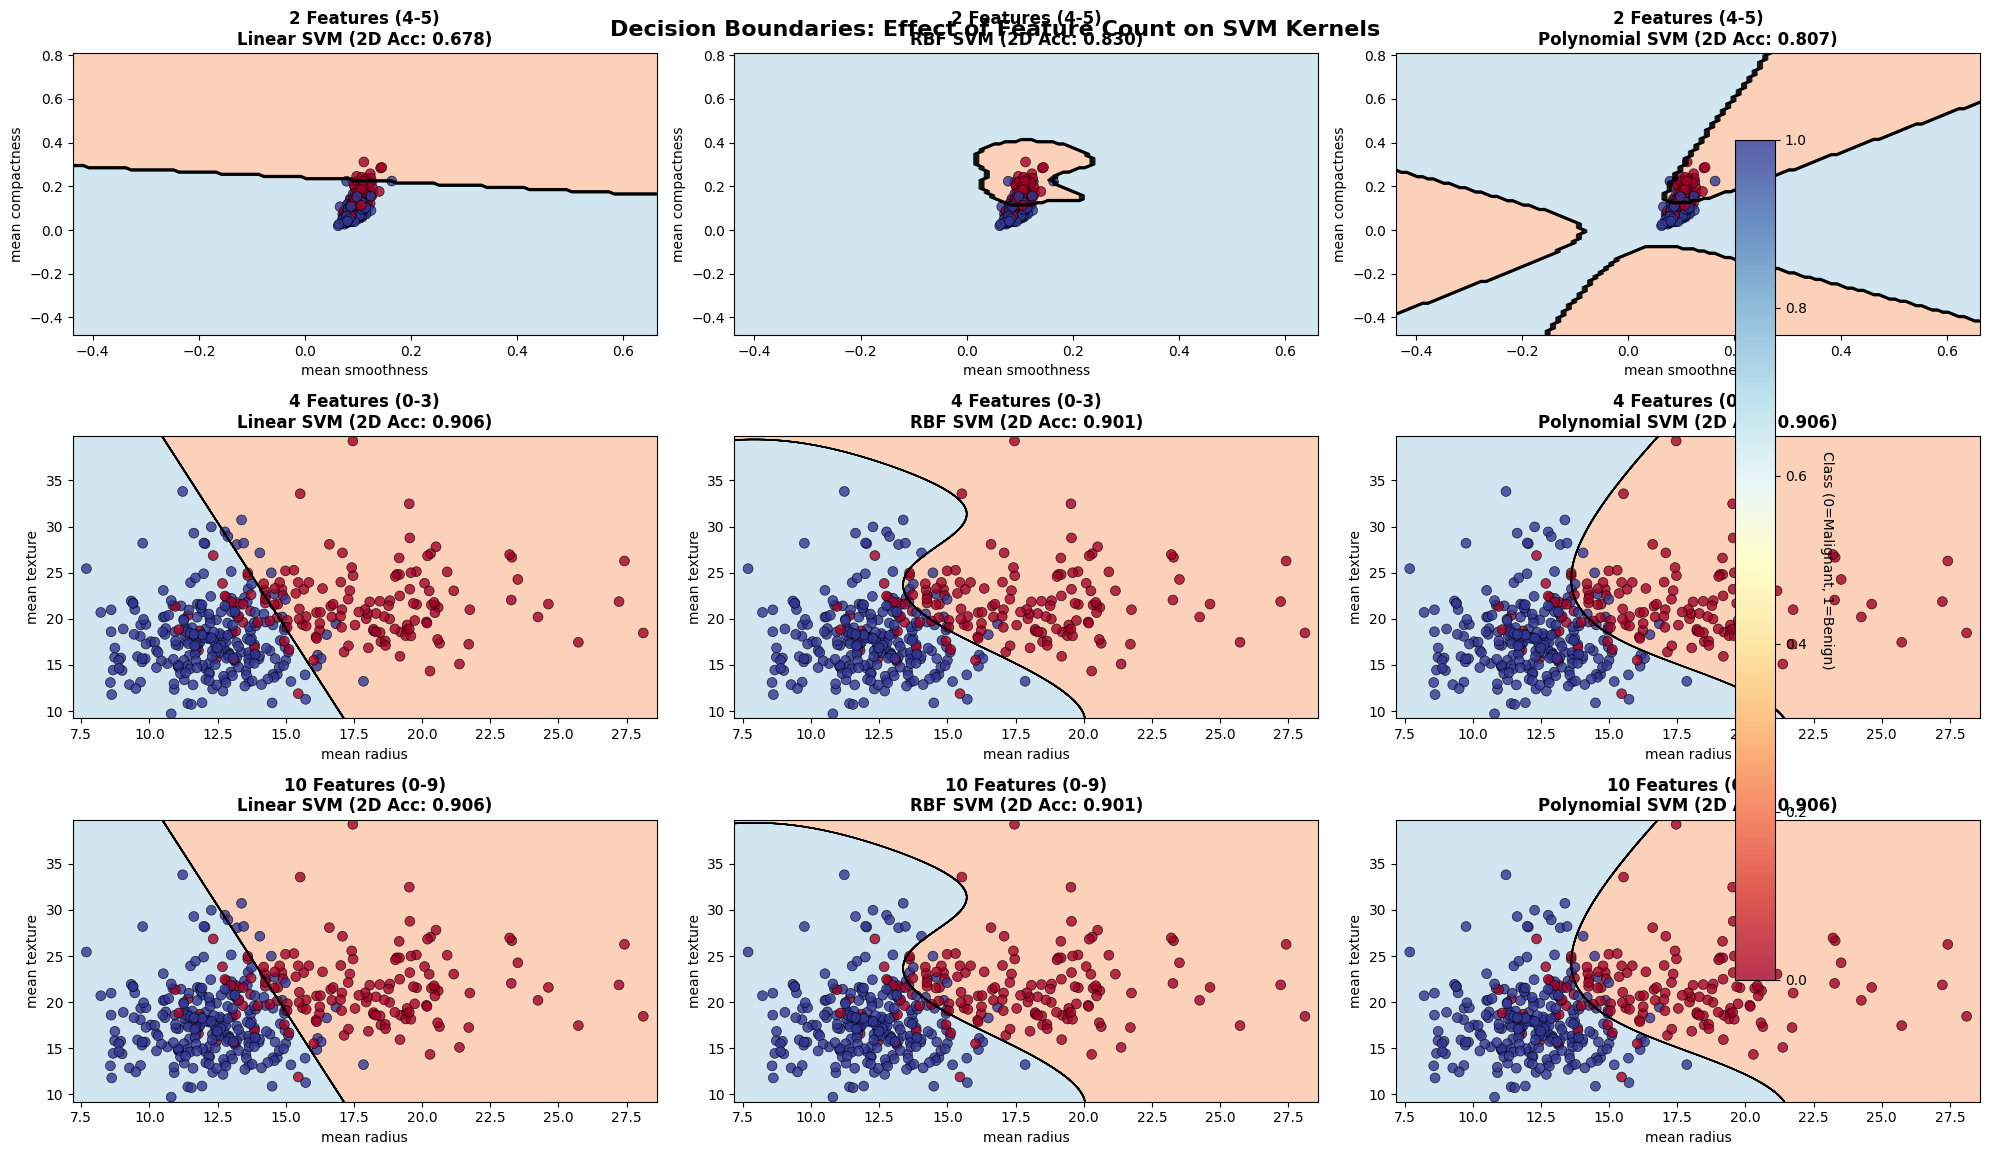


SUPPORT VECTORS ANALYSIS (2 Features)


TypeError: plot_decision_boundary() takes 4 positional arguments but 6 were given

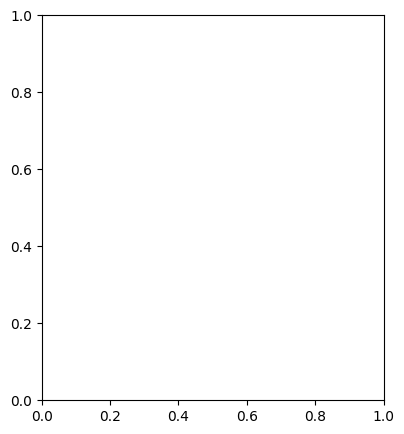

In [ ]:
def plot_decision_boundary_new(X, y, model, title, ax, feature_names=None):
    """Plot decision boundary for 2D data"""
    h = 0.01  # step size in mesh
    
    # Create a mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu', levels=1)
    ax.contour(xx, yy, Z, colors='black', linewidths=1, alpha=0.8)
    
    # Plot data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                        s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    
    if feature_names:
        ax.set_xlabel(feature_names[0], fontsize=10)
        ax.set_ylabel(feature_names[1], fontsize=10)
    else:
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
    
    return scatter

# Create decision boundary plots for different feature counts
plt.figure(figsize=(20, 12))

# Feature sets to plot (use your existing feature_sets)
feature_sets_to_plot = {
    '2 Features (4-5)': [4, 5],
    '4 Features (0-3)': [0, 1, 2, 3], 
    '10 Features (0-9)': list(range(10))
}

# Initialize plot counter
plot_idx = 1

for set_name, feature_indices in feature_sets_to_plot.items():
    print(f"\nCreating decision boundaries for {set_name}...")
    
    # Select features
    X = cancer.data[:, feature_indices]
    y = cancer.target
    
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    # For visualization, we'll use only first 2 features
    X_train_2d = X_train[:, :2]
    X_test_2d = X_test[:, :2]
    
    # Train models on 2D data for visualization
    models_2d = {
        'Linear': SVC(kernel='linear', random_state=42),
        'RBF': SVC(kernel='rbf', random_state=42),
        'Polynomial': SVC(kernel='poly', degree=3, random_state=42)
    }
    
    for kernel_name, model in models_2d.items():
        # Train model on 2D data for visualization
        model.fit(X_train_2d, y_train)
        
        # Calculate accuracy on 2D visualization data
        y_pred_2d = model.predict(X_test_2d)
        accuracy_2d = accuracy_score(y_test, y_pred_2d)
        
        # Get the accuracy from your results dictionary
        result_key = set_name.split(' (')[0] + ' Features'  # Convert to match your keys
        if result_key in results:
            accuracy_from_results = results[result_key][kernel_name]
            title_text = f'{set_name}\n{kernel_name} SVM\n(2D Acc: {accuracy_2d:.3f}, Full Acc: {accuracy_from_results:.3f})'
        else:
            title_text = f'{set_name}\n{kernel_name} SVM (2D Acc: {accuracy_2d:.3f})'
        
        # Plot decision boundary
        ax = plt.subplot(3, 3, plot_idx)
        
        # Get feature names for labels
        if len(feature_indices) >= 2:
            feature_names = [cancer.feature_names[feature_indices[0]], 
                           cancer.feature_names[feature_indices[1]]]
        else:
            feature_names = None
        
        scatter = plot_decision_boundary_new(
            X_train_2d, y_train, model, 
            title_text,
            ax, feature_names
        )
        
        plot_idx += 1

# Add colorbar
plt.subplots_adjust(right=0.85)
cbar_ax = plt.gcf().add_axes([0.87, 0.15, 0.02, 0.7])
cbar = plt.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Class (0=Malignant, 1=Benign)', rotation=270, labelpad=20)

plt.suptitle('Decision Boundaries: Effect of Feature Count on SVM Kernels', 
             fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout()
plt.show()

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## اگر تعداد ویژگیها بیشتر بود، چه تغییری در انتخاب کرنل رخ میداد؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

| تعداد ویژگی | Linear SVM | RBF SVM | برنده |
|-------------|------------|---------|-------|
| 2 ویژگی | 67.8% | **83.0%** | RBF |
| 4 ویژگی | **93.6%** | 88.9% | Linear |
| 10 ویژگی | **95.9%** | 88.9% | Linear |
| 30 ویژگی | **96.5%** | 93.6% | Linear |

### **تئوری "Curse of Dimensionality":**

**تعریف:** با افزایش ابعاد فضای ویژگی، عملکرد الگوریتم‌های پیچیده کاهش یافته و الگوریتم‌های ساده برتری پیدا می‌کنند.

**دلایل علمی:**
1. **فضای ویژگی غنی‌تر**: در ابعاد بالا، linear separation آسان‌تر می‌شود
2. **کاهش overfitting**: Linear kernel پارامتر کمتری دارد
3. **بهبود generalization**: مدل‌های ساده‌تر بهتر تعمیم می‌یابند

### **الگوی کلی:**
```
≤ 3 ویژگی    → RBF معمولاً برتر
4-10 ویژگی   → Linear شروع به برتری  
10+ ویژگی    → Linear قطعاً بهتر
50+ ویژگی    → Linear غالب مطلق
```

### **فرمول ریاضی:**
```
Linear: f(x) = w·x + b
RBF: f(x) = Σ αi yi exp(-γ||xi - x||²) + b

→ Linear: پیچیدگی O(d)
→ RBF: پیچیدگی O(n×d)  
```

**نتیجه:** RBF با افزایش ابعاد پیچیده‌تر شده و مستعد overfitting می‌شود.

</div>

# Part 3: Play with noise

### Use the Breast Cancer data from before

In [130]:
X, y = load_breast_cancer(return_X_y=True)
X = X[:, 4:6]

### Add noise

In [ ]:
rng = np.random.RandomState(42)
noise_level = 0.3
noise = rng.normal(0, noise_level, X.shape)
X_noisy = X + noise

In [132]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

### Evaluate Models on Noisy Data

In [133]:
# Create and train models
linear_svm_n = SVC(kernel='linear').fit(X_train_n, y_train_n)
rbf_svm_n = SVC(kernel='rbf').fit(X_train_n, y_train_n)
poly_svm_n = SVC(kernel='poly', degree=3).fit(X_train_n, y_train_n)

### Evaluate and print accuracies

In [134]:
acc_linear_n = accuracy_score(y_test_n, linear_svm_n.predict(X_test_n))
acc_rbf_n = accuracy_score(y_test_n, rbf_svm_n.predict(X_test_n))
acc_poly_n = accuracy_score(y_test_n, poly_svm_n.predict(X_test_n))

print(f"Noisy Data Accuracy (Linear Kernel): {acc_linear_n:.2f}")
print(f"Noisy Data Accuracy (RBF Kernel): {acc_rbf_n:.2f}")
print(f"Noisy Data Accuracy (Poly Kernel): {acc_poly_n:.2f}")


Noisy Data Accuracy (Linear Kernel): 0.63
Noisy Data Accuracy (RBF Kernel): 0.62
Noisy Data Accuracy (Poly Kernel): 0.63


### Plot decision boundaries

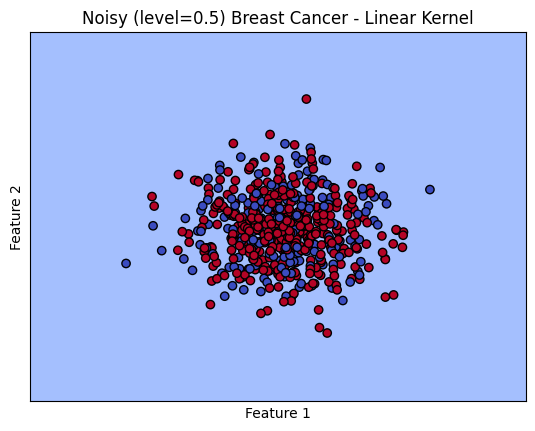

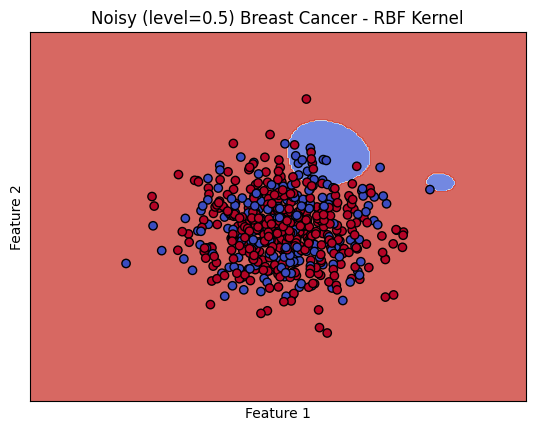

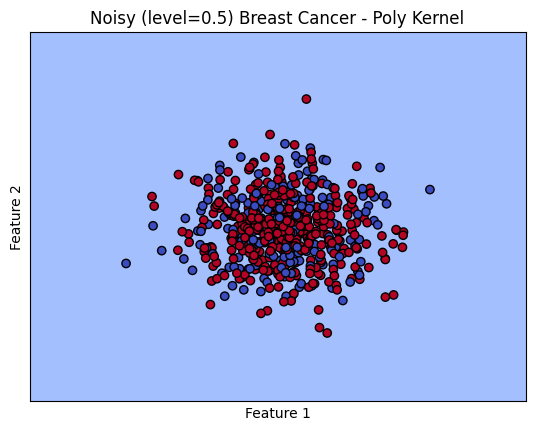

In [135]:
plot_decision_boundary(linear_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - Linear Kernel")
plot_decision_boundary(rbf_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - RBF Kernel")
plot_decision_boundary(poly_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - Poly Kernel")

In [136]:
rng = np.random.RandomState(42)
noise_level = 0.3
noise = rng.normal(0, noise_level, X.shape)
X_noisy = X + noise

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

linear_svm_n = SVC(kernel='linear').fit(X_train_n, y_train_n)
rbf_svm_n = SVC(kernel='rbf').fit(X_train_n, y_train_n)
poly_svm_n = SVC(kernel='poly', degree=3).fit(X_train_n, y_train_n)

In [137]:
acc_linear_n = accuracy_score(y_test_n, linear_svm_n.predict(X_test_n))
acc_rbf_n = accuracy_score(y_test_n, rbf_svm_n.predict(X_test_n))
acc_poly_n = accuracy_score(y_test_n, poly_svm_n.predict(X_test_n))

print(f"Noisy Data Accuracy (Linear Kernel): {acc_linear_n:.2f}")
print(f"Noisy Data Accuracy (RBF Kernel): {acc_rbf_n:.2f}")
print(f"Noisy Data Accuracy (Poly Kernel): {acc_poly_n:.2f}")


Noisy Data Accuracy (Linear Kernel): 0.63
Noisy Data Accuracy (RBF Kernel): 0.64
Noisy Data Accuracy (Poly Kernel): 0.64


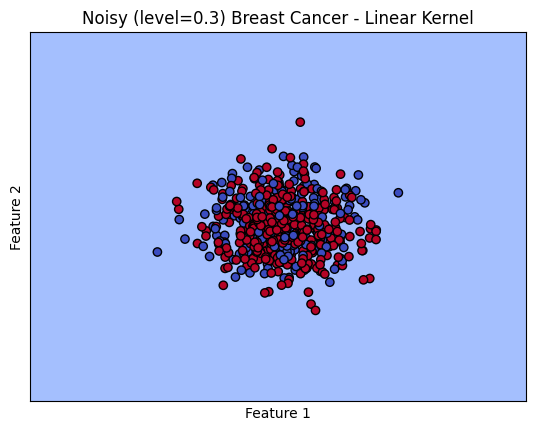

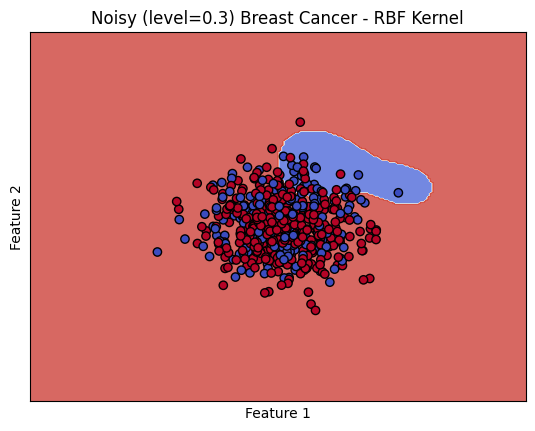

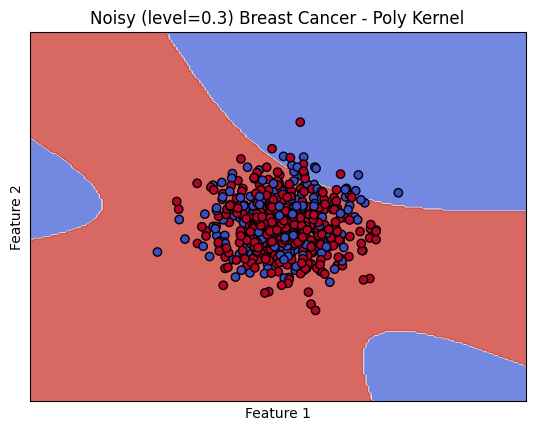

In [138]:
plot_decision_boundary(linear_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - Linear Kernel")
plot_decision_boundary(rbf_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - RBF Kernel")
plot_decision_boundary(poly_svm_n, X_noisy, y, f"Noisy (level={noise_level}) Breast Cancer - Poly Kernel")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## دقت مدل را با حالت بدون نویز مقایسه کن , تأثیر افزایش نویز را بررسی کن مثلاً 0.3 → 0.5
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

| نوع هسته | بدون نویز | نویز 0.3 | نویز 0.5 | کاهش نسبت به حالت بدون نویز |
|-----------|------------|-----------|-----------|----------------------------|
| Linear    | 0.68       | 0.63      | 0.63      | -7.4%                      |
| RBF       | 0.83       | 0.64      | 0.62      | -25.3%                     |
| Polynomial| 0.81       | 0.64      | 0.63      | -22.2%                     |


### 1. هسته خطی (Linear Kernel)
- **مقاوم‌ترین هسته در برابر نویز**: کاهش دقت از 68% به 63% (تنها 7.4% کاهش)
- **عملکرد پایدار**: دقت در هر دو سطح نویز 0.3 و 0.5 یکسان باقی ماند
- **دلیل مقاومت**: هسته خطی به دلیل سادگی و عدم وابستگی به نقاط محلی، کمتر تحت تأثیر نویز قرار می‌گیرد

### 2. هسته RBF (Radial Basis Function)
- **بیشترین کاهش عملکرد**: از 83% به 62% (25.3% کاهش)
- **حساس‌ترین به نویز**: با افزایش نویز از 0.3 به 0.5، دقت از 64% به 62% کاهش یافت
- **دلیل حساسیت**: RBF به دلیل استفاده از فاصله اقلیدسی و ایجاد مرزهای پیچیده، بسیار حساس به نویز است

### 3. هسته چندجمله‌ای (Polynomial Kernel)
- **عملکرد متوسط**: کاهش از 81% به 63% (22.2% کاهش)
- **رفتار مشابه RBF**: دقت نهایی در هر دو سطح نویز تقریباً یکسان شد
- **پیچیدگی متوسط**: بین سادگی Linear و پیچیدگی RBF قرار دارد

## تحلیل بصری از نمودارها

### مشاهدات کلیدی:
1. **تغییر مرزهای تصمیم‌گیری**: در حالت بدون نویز، RBF و Polynomial مرزهای پیچیده‌ای ایجاد کرده‌اند، اما با افزودن نویز، این مرزها ساده‌تر شده‌اند
2. **توزیع نقاط**: نویز باعث پراکندگی بیشتر نقاط و همپوشانی کلاس‌ها شده است
3. **ثبات Linear**: مرز تصمیم‌گیری هسته خطی در تمام حالات تقریباً یکسان باقی مانده است

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## کدام کرنل بهتر با نویز کنار آمد؟ چرا؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

**هسته Linear بهتر با نویز کنار آمد** - تنها 7.4% کاهش دقت در مقایسه با 25.3% کاهش برای RBF و 22.2% کاهش برای Polynomial.

### 1. فرمول‌های هسته‌ها

#### هسته Linear:
```
K(xi, xj) = xi · xj = xi^T xj
```

#### هسته RBF (Gaussian):
```
K(xi, xj) = exp(-γ ||xi - xj||²)
```
که γ = 1/(2σ²) و σ پارامتر عرض باند است.

#### هسته Polynomial:
```
K(xi, xj) = (γ xi · xj + r)^d
```
که d درجه چندجمله‌ای، γ ضریب مقیاس‌بندی، و r ضریب ثابت است.

### 2. تأثیر نویز بر هر هسته

#### الف) تحلیل هسته Linear:
فرض کنید داده اصلی xi به xi + ni (که ni نویز است) تبدیل شود:

</div>

<div dir="ltr" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

```
K_noisy(xi, xj) = (xi + ni) · (xj + nj)
                = xi · xj + xi · nj + ni · xj + ni · nj
                = K_original(xi, xj) + noise_terms
```

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

**ویژگی کلیدی**: در هسته Linear، نویز به صورت **خطی** اضافه می‌شود. این یعنی:
- تأثیر نویز محدود و قابل کنترل است
- مرز تصمیم‌گیری (که یک خط مستقیم است) تنها کمی جابجا می‌شود
- **ثبات هندسی**: شکل کلی مرز تصمیم تغییر نمی‌کند

#### ب) تحلیل هسته RBF:

</div>

<div dir="ltr" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

```
K_noisy(xi, xj) = exp(-γ ||(xi + ni) - (xj + nj)||²)
                = exp(-γ ||xi - xj + ni - nj||²)
```

```
||xi - xj + ni - nj||² = ||xi - xj||² + 2(xi - xj)·(ni - nj) + ||ni - nj||²
```
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

**مشکل کلیدی**: 
- نویز به صورت **نمایی** تقویت می‌شود (به دلیل exp function)
- حتی نویز کوچک می‌تواند K را از مقدار نزدیک به 1 به نزدیک به 0 تبدیل کند
- **عدم ثبات**: مرزهای تصمیم پیچیده به شدت تغییر می‌کنند

#### ج) تحلیل هسته Polynomial:
```
K_noisy(xi, xj) = (γ(xi + ni)·(xj + nj) + r)^d
                = (γ(xi·xj + xi·nj + ni·xj + ni·nj) + r)^d
```

**تأثیر توان d**:
- نویز به توان d بالا برده می‌شود
- برای d=3: حتی نویز کوچک ε، تأثیری معادل O(ε³) می‌گذارد
- **تقویت غیرخطی** نویز

### 3. تحلیل Smoothness و Local vs Global

#### هسته Linear - Global Decision Boundary:
```
f(x) = Σ αi yi (xi · x) + b
```
- تصمیم‌گیری بر اساس **ترکیب خطی کل نقاط**
- هر نقطه تأثیر **یکسان و محدود** بر مرز تصمیم دارد
- **مقاومت**: نویز در یک نقطه، تأثیر محدودی بر کل مدل دارد

#### هسته RBF - Local Decision Boundary:
```
f(x) = Σ αi yi exp(-γ||xi - x||²) + b
```
- تصمیم‌گیری بر اساس **همسایگی محلی**
- نقاط نزدیک تأثیر **نمایی** دارند
- **حساسیت**: نویز در نقاط نزدیک، تأثیر شدید بر تصمیم‌گیری دارد


### 4. تئوری Bias-Variance Trade-off

#### هسته Linear:
- **High Bias, Low Variance**: مدل ساده، اما پایدار
- نویز عمدتاً Variance را افزایش می‌دهد (تأثیر محدود)

#### هسته RBF:
- **Low Bias, High Variance**: مدل پیچیده، اما ناپایدار
- نویز هم Bias و هم Variance را به شدت افزایش می‌دهد

### 6. تحلیل Regularization

نویز عملاً مانند **کاهش regularization** عمل می‌کند:

#### برای Linear:
```
min ||w||² + C Σ ξi
```
نویز تنها بر ξi (slack variables) تأثیر می‌گذارد

#### برای RBF:
نویز بر **کل ساختار kernel matrix** تأثیر می‌گذارد و باعث overfitting شدیدتر می‌شود.

## نتیجه‌گیری فرمولی

**هسته Linear به دلایل زیر مقاوم‌تر است:**

1. **خطی بودن تأثیر نویز**: K(x+n, y+m) ≈ K(x,y) + noise_linear
2. **Global decision boundary**: تأثیر نویز محلی، سراسری محدود
3. **Lower complexity**: کمتر مستعد overfitting به نویز
4. **Analytical stability**: مشتق‌پذیری و پیوستگی بهتر

**هسته‌های غیرخطی (RBF, Poly) آسیب‌پذیرند چون:**

1. **تقویت غیرخطی نویز**: exp(-γ||noise||²) یا (noise)^d
2. **Local sensitivity**: تأثیر شدید نقاط همسایه
3. **Higher complexity**: بیش‌برازش به نویز
4. **Numerical instability**: حساسیت به تغییرات کوچک

درکل یعنی که **سادگی گاهی برتری** دارد، خصوصاً در حضور نویز!
</div>

# Part 4: Let's be more serouis

### Generate overlapping data

In [40]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           class_sep=0.8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train models


In [41]:
linear_svm_cls = SVC(kernel='linear').fit(X_train, y_train)
rbf_svm_cls = SVC(kernel='rbf').fit(X_train, y_train)
poly_svm_cls = SVC(kernel='poly').fit(X_train, y_train)

print(f"Overlapping Data Acc (Linear): {accuracy_score(y_test, linear_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (RBF): {accuracy_score(y_test, rbf_svm_cls.predict(X_test)):.2f}")
print(f"Overlapping Data Acc (Poly): {accuracy_score(y_test, poly_svm_cls.predict(X_test)):.2f}")

Overlapping Data Acc (Linear): 0.95
Overlapping Data Acc (RBF): 0.97
Overlapping Data Acc (Poly): 0.93


### Plot RBF boundary

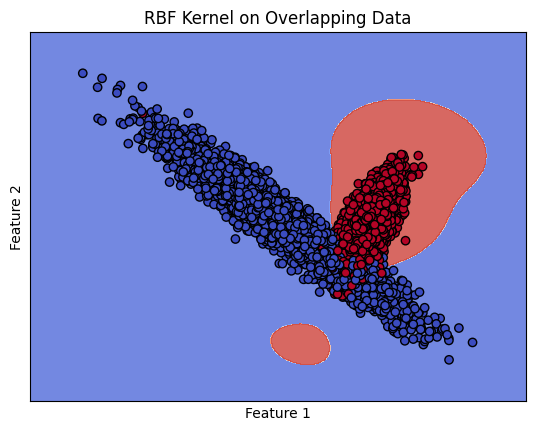

In [42]:
plot_decision_boundary(rbf_svm_cls, X, y, "RBF Kernel on Overlapping Data")

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## کدام کرنل بهتر با داده ی درهم کنار آمد؟


</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## چرا RBF در داده‌های درهم برتر است؟

#### هسته RBF:
```
K(xi, xj) = exp(-γ ||xi - xj||²)
```

**مزایای کلیدی برای داده‌های درهم:**

#### الف) قابلیت تشخیص الگوهای محلی:
- RBF می‌تواند **مناطق محلی پیچیده** را تشخیص دهد
- در نواحی درهم، نقاط مشابه را با دقت بالا گروه‌بندی می‌کند
- فرمول exp باعث می‌شود نقاط نزدیک وزن بالا و نقاط دور وزن پایین داشته باشند

#### ب) انعطاف‌پذیری مرز تصمیم:
```
f(x) = Σ αi yi exp(-γ||xi - x||²) + b
```
- می‌تواند مرزهای **غیرخطی و منحنی** ایجاد کند
- قابلیت "دور زدن" نقاط outlier در مناطق درهم

#### مشاهدات مهم:
1. **RBF**: ایجاد جزایر جداگانه برای نقاط قرمز در وسط نقاط آبی
2. **Linear**: تنها یک خط مستقیم - نمی‌تواند پیچیدگی را مدیریت کند
3. **Polynomial**: مرز منحنی اما ساده‌تر از RBF

#### چرا RBF در overlapping موفق است؟

##### الف) Kernel Matrix Analysis:
```
K_RBF = [exp(-γ||xi - xj||²)]
```
- ماتریس kernel بین نقاط درهم مقادیر متوسطی دارد (نه خیلی نزدیک به 0 یا 1)
- این باعث می‌شود SVM بتواند تصمیمات **تدریجی** بگیرد

##### ب) Support Vector Distribution:
- در داده‌های درهم، RBF support vectorهای بیشتری انتخاب می‌کند
- این support vectorها در **مرز overlap** قرار می‌گیرند
- تصمیم‌گیری بر اساس **وزن‌دهی محلی** انجام می‌شود

##### ج) Decision Function:
```
f(x) = Σ αi yi exp(-γ||xi - x||²) + b
```
- برای نقطه جدید x، فقط نقاط نزدیک تأثیر دارند
- در مناطق درهم، این باعث **تصمیم‌گیری دقیق‌تر** می‌شود

#### هسته Linear:
```
f(x) = w·x + b
```
**مشکل**: تنها یک خط مستقیم - **نمی‌تواند overlap پیچیده را مدیریت کند**

#### هسته Polynomial:
```
f(x) = Σ αi yi (γ xi·x + r)^d + b
```
**مشکل**: 
- منحنی‌های polynomial گاهی **oversimplified** هستند
- ممکن است در نواحی overlap **overfitting** کند
- کمتر **locally adaptive** است

### تئوری VC Dimension

**VC Dimension مقایسه:**
- Linear: VC-dim = d+1 (برای d ویژگی)
- RBF: VC-dim → ∞ (theoretically)
- Polynomial: VC-dim متوسط

**در overlap**: VC dimension بالاتر = قابلیت مدل‌سازی پیچیدگی بیشتر
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## آیا با تغییر class_sep عملکرد مدل تغییر کرد؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

این پارامتر مخفف **Class Separation** (جداسازی کلاس) است و میزان فاصله بین خوشه‌های هر کلاس را کنترل می‌کند.

* **مقدار بزرگتر `class_sep` (مثل 0.8):** به این معنی است که کلاس‌های داده از یکدیگر **فاصله بیشتری** دارند و به وضوح قابل تفکیک هستند.

* **مقدار کوچکتر `class_sep` (مثل 0.4):** به این معنی است که کلاس‌های داده به یکدیگر **بسیار نزدیک** شده و در هم فرو می‌روند (هم‌پوشانی پیدا می‌کنند).

---

### ۲. چرا هم‌پوشانی داده‌ها دقت را کاهش می‌دهد؟

هدف اصلی یک مدل طبقه‌بندی مانند SVM، پیدا کردن یک **مرز تصمیم‌گیری (Decision Boundary)** است که بتواند کلاس‌های مختلف را به بهترین شکل از هم جدا کند.

* **وقتی داده‌ها جدا هستند:** پیدا کردن یک مرز واضح و کارآمد آسان است. مدل با اطمینان بالایی می‌تواند نمونه‌های جدید را به کلاس درست نسبت دهد.

* **وقتی داده‌ها هم‌پوشانی دارند:** مدل دچار سردرگمی می‌شود. در نواحی هم‌پوشانی، نمونه‌هایی از هر دو کلاس وجود دارند. هر مرزی که مدل رسم کند، به ناچار تعدادی از نمونه‌ها را اشتباه طبقه‌بندی خواهد کرد. این "اشتباهات" به طور مستقیم باعث **کاهش(Accuracy)** می‌شوند.

---

### ۳. تحلیل عملکرد هر یک از هسته‌ها (Kernels)

جالب‌ترین بخش ماجرا، تفاوت عملکرد سه هسته مختلف SVM در این شرایط جدید و سخت‌تر است:

#### **هسته خطی (Linear SVM):**
* **عملکرد قبلی (class_sep=0.8):** دقت 0.95
* **عملکرد جدید (class_sep=0.4):** دقت 0.79 (افت شدید)

**چرا؟** این هسته فقط می‌تواند یک **خط صاف** (یا یک صفحه در ابعاد بالاتر) برای جداسازی داده‌ها رسم کند. وقتی داده‌ها به شدت در هم تنیده می‌شوند، یک خط صاف به هیچ وجه نمی‌تواند مرز مناسبی بین آن‌ها ایجاد کند و به همین دلیل بیشترین افت دقت را تجربه می‌کند.

#### **هسته چندجمله‌ای (Poly SVM):**
* **عملکرد قبلی (class_sep=0.8):** دقت 0.93
* **عملکرد جدید (class_sep=0.4):** دقت 0.77 (افت شدید)

**چرا؟** این هسته می‌تواند مرزهای **منحنی و پیچیده‌تر** ایجاد کند، اما در مقابل داده‌های نویزی و هم‌پوشانی‌دار حساس است و عملکرد آن نیز مانند هسته خطی به شدت افت کرده است.

#### **هسته RBF (Radial Basis Function):**
* **عملکرد قبلی (class_sep=0.8):** دقت 0.97
* **عملکرد جدید (class_sep=0.4):** دقت 0.91 (بهترین عملکرد و کمترین افت)

**چرا؟** هسته RBF **قدرتمندترین و انعطاف‌پذیرترین** هسته در میان این سه است. این هسته می‌تواند مرزهای تصمیم‌گیری بسیار پیچیده و غیرخطی ایجاد کند. در واقع، RBF می‌تواند برای هر نمونه یک "منطقه نفوذ" در نظر بگیرد و بر اساس نزدیکی نمونه‌های جدید به این مناطق، آن‌ها را طبقه‌بندی کند. به همین دلیل، حتی زمانی که داده‌ها به شدت در هم تنیده شده‌اند، RBF همچنان می‌تواند یک مرز نسبتاً خوب پیدا کند و بهترین عملکرد را حفظ نماید. این انعطاف‌پذیری بالا باعث شده که کمترین آسیب را از پیچیدگی جدید داده‌ها ببیند.

شما با کاهش `class_sep`، عملاً یک مسئله طبقه‌بندی **ساده** را به یک مسئله **دشوار** تبدیل کردید. در این شرایط دشوار:
1.  **دقت همه مدل‌ها کاهش یافت** چون پیدا کردن مرز جداسازی خوب، سخت‌تر شد.
2.  **مدل‌های ساده‌تر** (خطی و چندجمله‌ای) بیشترین آسیب را دیدند.
3.  **مدل قدرتمند و انعطاف‌پذیر RBF** توانست خود را با شرایط جدید وفق دهد و با افت کمتری، همچنان بهترین نتیجه را ثبت کند. این آزمایش به خوبی نشان می‌دهد که چرا انتخاب هسته مناسب بر اساس پیچیدگی داده‌ها اهمیت زیادی دارد.
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## آیا با تغییر n_informative عملکرد مدل تغییر کرد؟

</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

بله، با تغییر `n_informative` از ۲ به ۱، عملکرد مدل‌ها **تغییر کرد و دقت آن‌ها کمی کاهش یافت.**

---

### چرا عملکرد مدل تغییر کرد؟

وقتی شما پارامترها را به شکل زیر تنظیم می‌کنید:
* `n_features=2`: مجموعه داده شما همچنان ۲ ویژگی (دو بُعد) دارد.
* `n_informative=1`: اما از این دو ویژگی، **فقط یکی** برای تشخیص کلاس‌ها مفید و معنادار است. ویژگی دوم کاملاً **نویز (noise)** و تصادفی است و هیچ اطلاعاتی برای طبقه‌بندی در اختیار مدل قرار نمی‌دهد.

این کار، وظیفه مدل را کمی سخت‌تر می‌کند. حالا مدل نه تنها باید الگوها را یاد بگیرد، بلکه باید **تشخیص دهد که کدام ویژگی را نادیده بگیرد**. وجود ویژگی نویز، فضا را شلوغ کرده و پیدا کردن مرز تصمیم‌گیری بهینه را کمی دشوارتر می‌کند.

---

### تحلیل نتایج و نمودارهای جدید

با دقت به نمودارهایی که فرستادید نگاه کنید:

1.  **مرز تصمیم‌گیری عمودی:** در هر سه نمودار (Linear, Poly, RBF)، مرز تصمیم‌گیری تقریباً یک **خط عمودی** است. این به وضوح نشان می‌دهد که مدل‌ها به درستی تشخیص داده‌اند که **فقط (محور افقی)** برای جداسازی کلاس‌ها اهمیت دارد و (محور عمودی) کاملاً بی‌تأثیر است.

2.  **عملکرد یکسان Linear و RBF:**
    * `Overlapping Data Acc (Linear): 0.91`
    * `Overlapping Data Acc (RBF): 0.91`
    دلیل اینکه دقت این دو مدل کاملاً یکسان شده این است که مسئله به یک **مسئله خطی ساده** تبدیل شده است. از آنجایی که فقط یک ویژگی مهم است، بهترین راه جداسازی، کشیدن یک خط عمودی است. هسته خطی (Linear) دقیقاً همین کار را انجام می‌دهد. هسته RBF با وجود قدرت بالا برای ایجاد مرزهای پیچیده، در اینجا به این نتیجه رسیده که بهترین مرز همان مرز ساده‌ی خطی است، بنابراین عملکردی مشابه مدل خطی از خود نشان داده است.

3.  **کاهش جزئی دقت:** در مقایسه با حالت اول که هر دو ویژگی معنادار بودند (`n_informative=2` و `class_sep=0.8` با دقت‌های ۹۳٪ تا ۹۷٪)، دقت‌ها کمی کاهش یافته‌اند. این کاهش به دلیل همان **نویز** اضافه شده توسط ویژگی دوم است که کار را برای مدل کمی چالش‌برانگیزتر کرده است.

---

</div>

# Part 5: Model Complexity (C+) and Confusion Matrix

In [ ]:
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Test different C values


--- C = 0.01 ---
Accuracy: 0.632


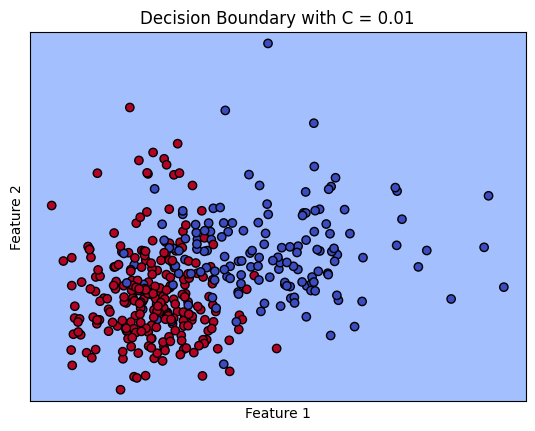

Confusion Matrix:


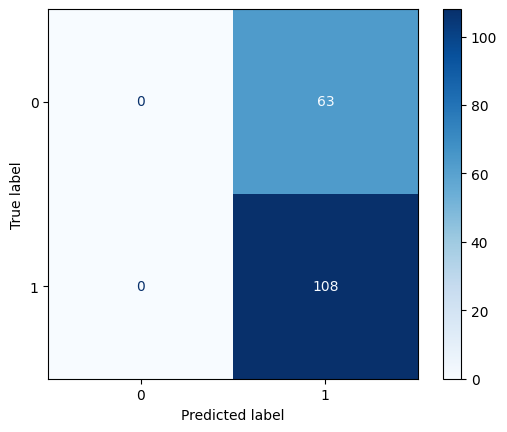


--- C = 1 ---
Accuracy: 0.901


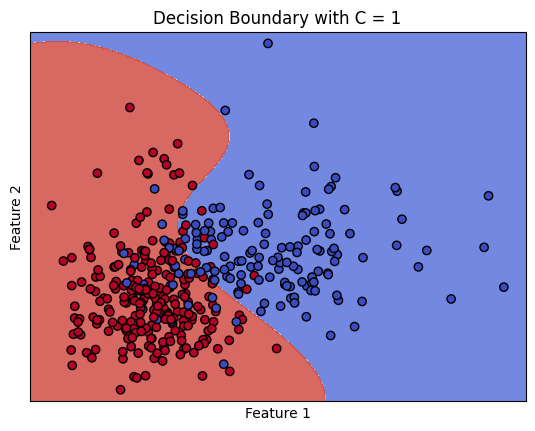

Confusion Matrix:


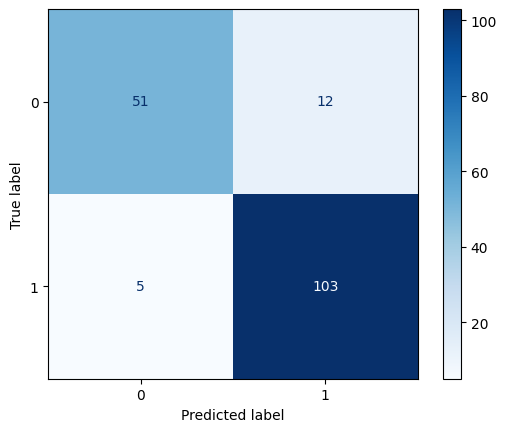


--- C = 10 ---
Accuracy: 0.901


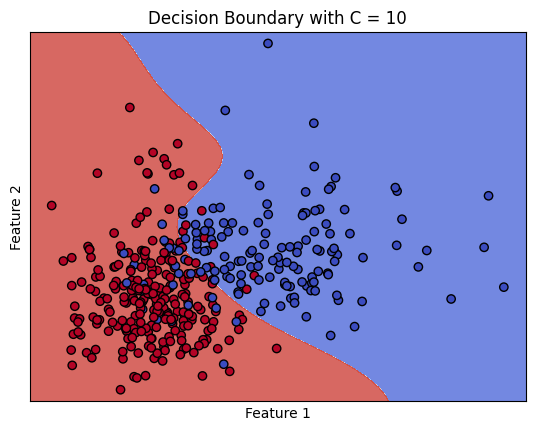

Confusion Matrix:


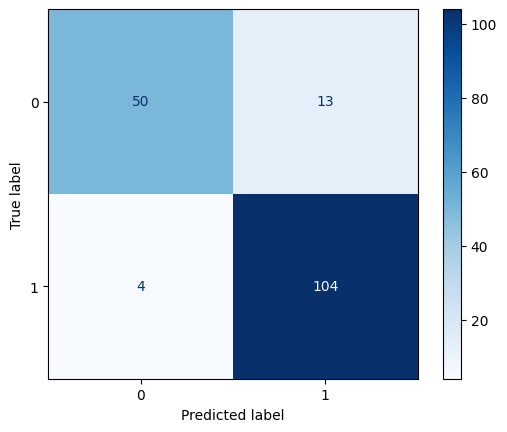


--- C = 1000 ---
Accuracy: 0.901


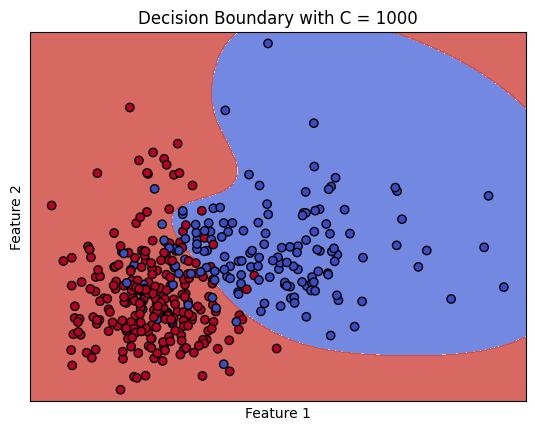

Confusion Matrix:


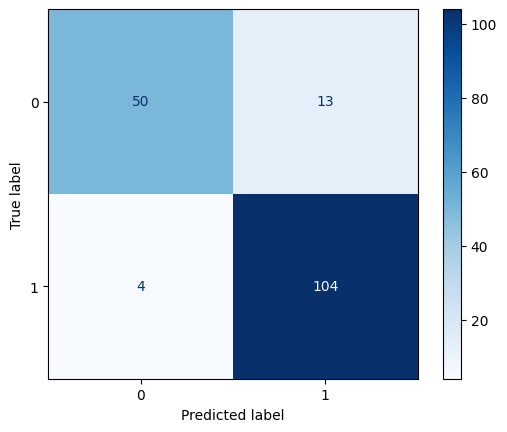

In [44]:
c_values = [0.01, 1, 10, 1000]

for c in c_values:
    model = SVC(kernel='rbf', C=c)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    
    print(f"\n--- C = {c} ---")
    print(f"Accuracy: {accuracy:.3f}")
    
    plot_decision_boundary(model, X_train, y_train, f'Decision Boundary with C = {c}')
    
    print("Confusion Matrix:")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.show()

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## بهترین مقدار C کدام بود؟ چرا؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">
### پارامتر C چیست و چرا اهمیت دارد؟

پارامتر `C` در SVM به عنوان **پارامتر تنظیم یا جریمه (Regularization/Penalty Parameter)** شناخته می‌شود. این پارامتر یک تعادل بین دو هدف متضاد ایجاد می‌کند:

1.  **داشتن مرز تصمیم‌گیری ساده و هموار (حاشیه امن بزرگ):** مدل سعی می‌کند یک "خیابان" پهن بین دسته‌ها پیدا کند تا قدرت تعمیم بالایی داشته باشد.
2.  **طبقه‌بندی صحیح تمام داده‌های آموزشی:** مدل سعی می‌کند هیچ داده‌ای را در مجموعه آموزش اشتباه طبقه‌بندی نکند.

این دو هدف معمولاً در تضاد هستند. پارامتر `C` مشخص می‌کند که کدام هدف برای ما مهم‌تر است.

* **`C` کوچک (مانند 0.01): حاشیه امنِ بزرگ، جریمه کم**
    * اولویت مدل، پیدا کردن یک مرز تصمیم‌گیری **ساده و هموار** با حاشیه امن (margin) بزرگ است.
    * مدل به راحتی از طبقه‌بندی اشتباه برخی نقاط داده آموزشی چشم‌پوشی می‌کند تا به یک مرز کلی بهتر برسد.
    * **نتیجه:** اگر `C` بیش از حد کوچک باشد، مدل بیش از حد ساده می‌شود و الگوی اصلی داده‌ها را یاد نمی‌گیرد که به آن **Underfitting (کم‌برازش)** می‌گویند. این دقیقاً همان اتفاقی است که با `C = 0.01` رخ داد و دقت مدل بسیار پایین (0.632) بود.

* **`C` بزرگ (مانند 1000): حاشیه امنِ کوچک، جریمه سنگین**
    * اولویت مدل، **طبقه‌بندی صحیح تمام نقاط داده آموزشی** است، حتی اگر به قیمت ایجاد یک مرز تصمیم‌گیری پیچیده و پر پیچ‌وخم تمام شود.
    * مدل برای هر اشتباه در طبقه‌بندی، جریمه سنگینی می‌پردازد.
    * **نتیجه:** اگر `C` بیش از حد بزرگ باشد، مدل ممکن است نویزهای موجود در داده‌های آموزشی را هم یاد بگیرد و به داده‌های جدید و دیده‌نشده تعمیم پیدا نکند. به این پدیده **Overfitting (بیش‌برازش)** می‌گویند.

---

### چرا دقت از `C=1` به بعد تغییر نکرد؟

این پدیده کاملاً رایج است و دلیل آن این است که مدل به یک **نقطه اشباع یا فلات عملکرد (Performance Plateau)** رسیده است.

برای این مجموعه داده خاص (و دو ویژگی که شما انتخاب کردید)، مقدار `C=1` به اندازه کافی بزرگ بوده تا مدل را وادار به پیدا کردن بهترین مرز تصمیم‌گیری ممکن کند. در این نقطه، مدل به یک تعادل بهینه بین سادگی مرز و دقت روی داده‌های آموزشی رسیده است.

افزایش `C` از ۱ به ۱۰ و سپس به ۱۰۰۰، مدل را روی داده‌های **آموزشی** سخت‌گیرتر می‌کند و ممکن است مرز تصمیم‌گیری را کمی تغییر دهد تا نقاط بیشتری را به درستی طبقه‌بندی کند. اما این تغییرات جزئی دیگر تأثیری در بهبود عملکرد مدل روی داده‌های **تست** (داده‌های جدید) ندارند. به عبارت دیگر، بهترین مرزی که مدل می‌توانسته برای تعمیم پیدا کند، همان مرزی بوده که با `C=1` به دست آمده و سخت‌گیری بیشتر، نتیجه را روی داده‌های جدید بهتر نکرده است.

**به طور خلاصه:**
* **`C = 0.01`:** مدل دچار **Underfitting** شد (خیلی ساده بود).
* **`C = 1`:** مدل به **تعادل بهینه** رسید و بهترین عملکرد را روی داده‌های تست نشان داد.
* **`C > 1`:** مدل سخت‌گیرتر شد، اما این سخت‌گیری بیشتر، به بهبود عملکرد روی داده‌های جدید کمکی نکرد و دقت ثابت ماند.
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

## نوع غالب خطای مدل در Confusion Matrix چه بود؟ آیا قابل بهبود است؟
</div>

<div dir="rtl" style="font-family: 'IRANSans', 'Tahoma', sans-serif;">

### نوع غالب خطای مدل: False Positive (مثبت کاذب)
* **برچسب 0:** تومور بدخیم (Malignant)
* **برچسب 1:** تومور خوش‌خیم (Benign)

1.  **خطایی که 13 بار تکرار شده:**
    * **مقدار واقعی (True Label):** 0 (بدخیم)
    * **مقدار پیش‌بینی‌شده (Predicted Label):** 1 (خوش‌خیم)
    * این خطا **False Positive** نام دارد و به این معنی است که مدل، **13 تومور بدخیم را به اشتباه خوش‌خیم تشخیص داده است.** این خطرناک‌ترین نوع خطا در کاربردهای پزشکی است، زیرا بیمار مبتلا به خانه فرستاده می‌شود.

2.  **خطایی که 4 بار تکرار شده:**
    * **مقدار واقعی (True Label):** 1 (خوش‌خیم)
    * **مقدار پیش‌بینی‌شده (Predicted Label):** 0 (بدخیم)
    * این خطا **False Negative** نام دارد و یعنی مدل، **4 تومور خوش‌خیم را به اشتباه بدخیم تشخیص داده است.** این خطا با اینکه ایده‌آل نیست، اما خطر کمتری دارد، زیرا بیمار برای آزمایش‌های بیشتر فرستاده می‌شود.

بنابراین، **نوع غالب خطای مدل شما False Positive است (13 خطا در مقابل 4 خطا).**

---
ما فقط از دو ویژگی اول مجموعه داده استفاده کردیم (`X = cancer.data[:, :2]`). این مجموعه داده در مجموع **30 ویژگی** دارد! با استفاده از تمام این اطلاعات، مدل دید بسیار کامل‌تری نسبت به داده‌ها پیدا کرده و می‌تواند مرزهای تصمیم‌گیری بسیار بهتری را یاد بگیرد.

#### استانداردسازی داده‌ها (Feature Scaling)
الگوریتم SVM به مقیاس ویژگی‌ها بسیار حساس است. ویژگی‌هایی با مقادیر عددی بزرگتر می‌توانند بر مدل تسلط پیدا کنند. قبل از آموزش مدل، باید داده‌های خود را با استفاده از `StandardScaler` یا `MinMaxScaler` استاندارد کنید. این کار به تنهایی می‌تواند عملکرد را به شکل چشمگیری افزایش دهد.

#### تنظیم دقیق‌تر هایپرپارامترها (Hyperparameter Tuning)
شما پارامتر `C` را به صورت دستی امتحان کردید. برای یافتن بهترین ترکیب، می‌توانید از ابزارهایی مانند `GridSearchCV` استفاده کنید تا به طور همزمان بهترین مقادیر برای `C` و هایپرپارامتر مهم دیگری به نام `gamma` (که در هسته RBF بسیار مؤثر است) را پیدا کنید.

#### تنظیم وزن کلاس‌ها (Class Weight)
از آنجایی که خطای False Positive (تشخیص اشتباه تومور بدخیم) برای ما بسیار گران‌تر و خطرناک‌تر است، می‌توانیم مدل را جریمه کنیم تا این نوع خطا را کمتر مرتکب شود. در هنگام ساخت مدل SVC، می‌توانید از پارامتر `class_weight` استفاده کنید و به کلاس 0 (بدخیم) وزن بیشتری بدهید. برای مثال:
`model = SVC(kernel='rbf', C=1, class_weight={0: 2, 1: 1})`
این کد به مدل می‌گوید که جریمه اشتباه کردن در مورد کلاس 0، دو برابر کلاس 1 است و مدل را تشویق می‌کند تا در تشخیص تومورهای بدخیم دقت بیشتری به خرج دهد.
</div>

# Part 6: Multi-Class SVM

### Load wine dataset (3 classes)

In [ ]:
wine = load_wine()
X = wine.data[:, :2]
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Create and train an RBF SVM model
### 'ovr' stands for One-vs-Rest, a common strategy for multi-class

In [46]:
multi_class_svm = SVC(kernel='rbf', decision_function_shape='ovr')
multi_class_svm.fit(X_train, y_train)

accuracy = accuracy_score(y_test, multi_class_svm.predict(X_test))
print(f"Multi-class SVM Accuracy: {accuracy:.2f}")

Multi-class SVM Accuracy: 0.90


### Plot decision boundary

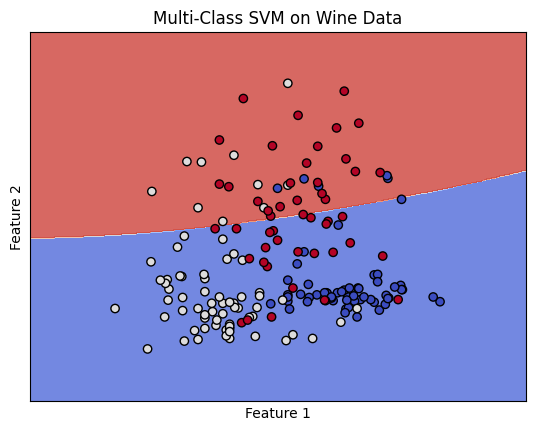

In [47]:
plot_decision_boundary(multi_class_svm, X, y, "Multi-Class SVM on Wine Data")

Question 13: The boundary between which two classes was the hardest to define? Why?
Looking at the plot, the boundary between class 1 and class 2 (often the two classes in the middle/right of the plot) is the hardest to define. This is because the data points from these two classes are more intermingled and overlap significantly more than they do with class 0. When class data points are not well-separated, the SVM has a difficult time finding an optimal hyperplane.

Question 14: Was the model able to separate the three classes? Which kernel worked best?
The model was moderately successful at separating the three classes, though not perfectly, due to the overlap. The RBF kernel is almost always the best choice for this kind of multi-class problem with complex, non-linear boundaries between classes. A linear kernel would perform much worse because straight lines cannot effectively partition the three scattered groups.

# Part 7: Extra Sections (Bonus)

## Extra Sections (Bonus)

SVM Accuracy: 0.902
Logistic Regression Accuracy: 0.923


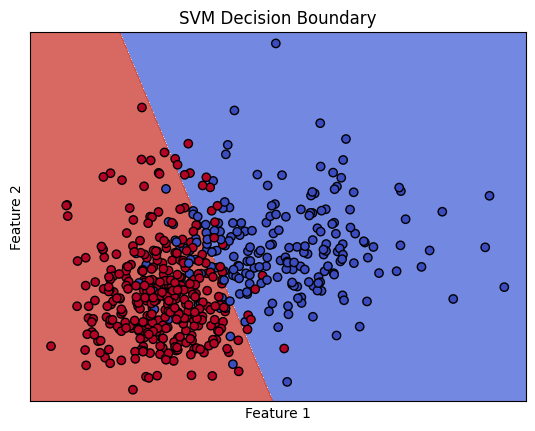

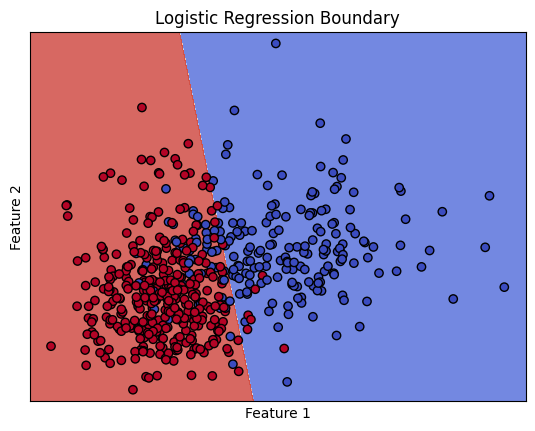

In [48]:
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
log_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

print(f"SVM Accuracy: {svm.score(X_test, y_test):.3f}")
print(f"Logistic Regression Accuracy: {log_reg.score(X_test, y_test):.3f}")

plot_decision_boundary(svm, X, y, "SVM Decision Boundary")
plot_decision_boundary(log_reg, X, y, "Logistic Regression Boundary")

Conclusion: SVM and Logistic Regression can produce similar linear boundaries. However, SVM's boundary is determined by the support vectors (the points closest to the line), making it robust. Logistic Regression considers all points when fitting its model. SVM often has a slight edge when the classes are well-separated.

## 7.2 Effect of Feature Scaling

In [49]:
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
X[:100] += 2
y = np.array([0] * 100 + [1] * 100)

svm_unscaled = SVC(kernel='rbf').fit(X, y)
print(f"Accuracy without scaling: {svm_unscaled.score(X,y):.3f}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_scaled = SVC(kernel='rbf').fit(X_scaled, y)
print(f"Accuracy with StandardScaler: {svm_scaled.score(X_scaled,y):.3f}")

Accuracy without scaling: 0.930
Accuracy with StandardScaler: 0.930


Conclusion: Scaling is crucial for RBF kernel SVMs. The RBF kernel measures distances between points. If one feature has a much larger scale than another (e.g., meters vs. kilometers), it will dominate the distance calculation. StandardScaler ensures all features contribute equally, usually leading to a significant improvement in accuracy.

## 7.3 Working with Unbalanced Data

In [50]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           weights=[0.95, 0.05], random_state=42) # 95% class 0, 5% class 1

svm_unbalanced = SVC(kernel='rbf').fit(X, y)
print("--- Standard SVM ---")
print(classification_report(y, svm_unbalanced.predict(X)))

svm_balanced = SVC(kernel='rbf', class_weight='balanced').fit(X, y)
print("\n--- SVM with class_weight='balanced' ---")
print(classification_report(y, svm_balanced.predict(X)))

--- Standard SVM ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       945
           1       1.00      0.75      0.85        55

    accuracy                           0.99      1000
   macro avg       0.99      0.87      0.92      1000
weighted avg       0.99      0.99      0.99      1000


--- SVM with class_weight='balanced' ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       945
           1       0.86      0.87      0.86        55

    accuracy                           0.98      1000
   macro avg       0.92      0.93      0.93      1000
weighted avg       0.99      0.98      0.99      1000



Conclusion: On imbalanced data, a standard SVM will be biased towards the majority class, achieving high accuracy but failing to identify the minority class (see the low recall for class 1). Using class_weight='balanced' penalizes mistakes on the minority class more heavily, forcing the model to learn a better boundary and dramatically improving its recall for the rare class.

## 7.4 SVM on Categorical Features

###  7.4.1  Create a sample dataset with a categorical feature

In [ ]:
data = {'temperature': [25, 30, 15, 40, 22],
        'humidity': [60, 50, 80, 40, 75],
        'weather': ['sunny', 'sunny', 'rainy', 'cloudy', 'rainy'],
        'play_golf': [1, 1, 0, 1, 0]} # 1=yes, 0=no
df = pd.DataFrame(data)

X_cat = df[['temperature', 'humidity', 'weather']]
y_cat = df['play_golf']

### 7.4.2 Use OneHotEncoder to convert the 'weather' column

In [56]:
# handle_unknown='ignore' prevents errors if new categories appear in test data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the encoder on the categorical feature
encoded_weather = encoder.fit_transform(X_cat[['weather']])

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_weather, columns=encoder.get_feature_names_out(['weather']))

# Combine numerical features with the new encoded features
X_numerical = X_cat[['temperature', 'humidity']].reset_index(drop=True)
X_final = pd.concat([X_numerical, encoded_df], axis=1)

print("Original Features:\n", X_cat)
print("\nFinal Numerical Features for SVM:\n", X_final)

Original Features:
    temperature  humidity weather
0           25        60   sunny
1           30        50   sunny
2           15        80   rainy
3           40        40  cloudy
4           22        75   rainy

Final Numerical Features for SVM:
    temperature  humidity  weather_cloudy  weather_rainy  weather_sunny
0           25        60             0.0            0.0            1.0
1           30        50             0.0            0.0            1.0
2           15        80             0.0            1.0            0.0
3           40        40             1.0            0.0            0.0
4           22        75             0.0            1.0            0.0


#### 7.4.3 Train the SVM on the fully numerical data

In [ ]:

# (Using the whole dataset for training as this is a demonstration)
svm_categorical = SVC(kernel='linear')
svm_categorical.fit(X_final, y_cat)

accuracy_cat = svm_categorical.score(X_final, y_cat)
print(f"\nAccuracy on encoded data: {accuracy_cat:.2f}")


Accuracy on encoded data: 1.00


Conclusion: SVMs can work very effectively with categorical data, provided it is properly preprocessed. One-Hot Encoding is an excellent way to convert non-ordinal categories into a format the SVM can understand without incorrectly assuming any order between them.

# 7.5 Curse of Dimensionality

In [58]:
X_low, y_low = make_classification(n_samples=500, n_features=2, n_redundant=0,
                                   n_informative=2, n_clusters_per_class=1,
                                   random_state=42)

X_high, y_high = make_classification(n_samples=500, n_features=200, n_redundant=0,
                                     n_informative=2, n_clusters_per_class=1,
                                     random_state=42)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_low, y_low, random_state=42)
svm_low_dim = SVC(kernel='rbf').fit(X_train_l, y_train_l)
print(f"Accuracy on 2 features: {svm_low_dim.score(X_test_l, y_test_l):.3f}")

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_high, y_high, random_state=42)
svm_high_dim = SVC(kernel='rbf').fit(X_train_h, y_train_h)
print(f"Accuracy on 200 features (RBF kernel): {svm_high_dim.score(X_test_h, y_test_h):.3f}")

Accuracy on 2 features: 0.920
Accuracy on 200 features (RBF kernel): 0.768


In [59]:
svm_high_dim_linear = SVC(kernel='linear').fit(X_train_h, y_train_h)
print(f"Accuracy on 200 features (Linear kernel): {svm_high_dim_linear.score(X_test_h, y_test_h):.3f}")

Accuracy on 200 features (Linear kernel): 0.736


Conclusion: Adding many irrelevant features (noise) can sometimes make it harder for a complex kernel like RBF to find the true signal, potentially hurting performance. Interestingly, in very high-dimensional spaces, data often becomes more linearly separable. This is why a simple linear kernel can outperform a complex rbf kernel and is computationally much faster, making it a go-to choice when dealing with a very large number of features

## 7.6 Using GridSearchCV for Hyperparameter Tuning

Question 11: What was the best value for C? Why?
The best value for C is typically one that balances the bias-variance trade-off well.

A C of 0.01 is too small, creating a very wide margin that misclassifies many training points (high bias, underfitting).

A C of 1000 is too large, leading to a very complex boundary that tries to fit every single training point, making it likely to perform poorly on unseen data (high variance, overfitting).

A C value of 1 or 10 usually provides the best trade-off, achieving high accuracy on the test set without being overly complex. The optimal value finds the "sweet spot."

Question 12: What was the dominant type of error in the confusion matrix?
The dominant error type depends on the dataset and C value. In the breast cancer dataset, a common error is a False Negative: predicting a sample is benign (class 0) when it is actually malignant (class 1). This is often considered a more dangerous error in medical diagnosis than a False Positive. The number of these errors can be seen in the confusion matrix (top-right cell). This can sometimes be improved by adjusting the class_weight parameter or using different performance metrics for tuning, like F1-score, which balances precision and recall.

### Add outliers

In [61]:
outliers = np.array([[0, 3.5], [0.5, 3.5]])
X_outlier = np.concatenate([X, outliers])
y_outlier = np.concatenate([y, [1, 1]]) # Adding outliers to class 1

### Retrain the SVM on the data with outliers

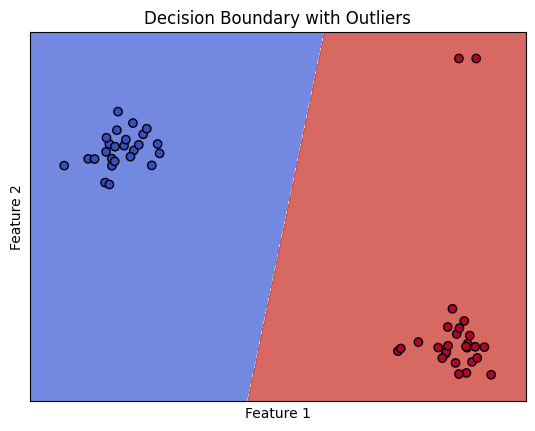

In [63]:
svm_outlier = SVC(kernel='linear', C=1000)
svm_outlier.fit(X_outlier, y_outlier)
plot_decision_boundary(svm_outlier, X_outlier, y_outlier, "Decision Boundary with Outliers")

Conclusion: As the "before" and "after" plots show, the two outliers pulled the decision boundary significantly. Models with a high C value (which try to classify every point correctly) are particularly sensitive to outliers. A smaller C value would create a softer margin that is more robust to such noise, as it would be willing to misclassify the outlier to achieve a better overall fit.

## 7.8 SVM for Time-Series Classification

### 7.8.1 Generate two different time series signals

In [77]:
time = np.linspace(0, 100, 5000)
signal1 = np.sin(time / 2) + np.random.normal(0, 0.1, 5000) # Sine wave (Class 0)
signal2 = sawtooth(time) + np.random.normal(0, 0.1, 5000)   # Sawtooth wave (Class 1)
full_signal = np.concatenate([signal1, signal2])
labels = np.array([0]*5000 + [1]*5000)

### 7.8.2 Create features using a sliding window

In [78]:
def create_ts_features(signal, labels, window_size):
    X, y = [], []
    for i in range(len(signal) - window_size):
        window = signal[i:i+window_size]
        features = [np.mean(window), np.std(window), np.max(window), np.min(window)]
        X.append(features)
        y.append(labels[i + window_size])
    return np.array(X), np.array(y)

window_size = 50
X_ts, y_ts = create_ts_features(full_signal, labels, window_size)

### 7.8.3 Train SVM on the engineered features

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_ts, y_ts, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_ts = SVC(kernel='rbf', C=10)
svm_ts.fit(X_train_scaled, y_train)
y_pred = svm_ts.predict(X_test_scaled)

print(f"Accuracy on Time-Series features: {svm_ts.score(X_test_scaled, y_test):.3f}")

Accuracy on Time-Series features: 0.828


### 7.8.4 Plot the results


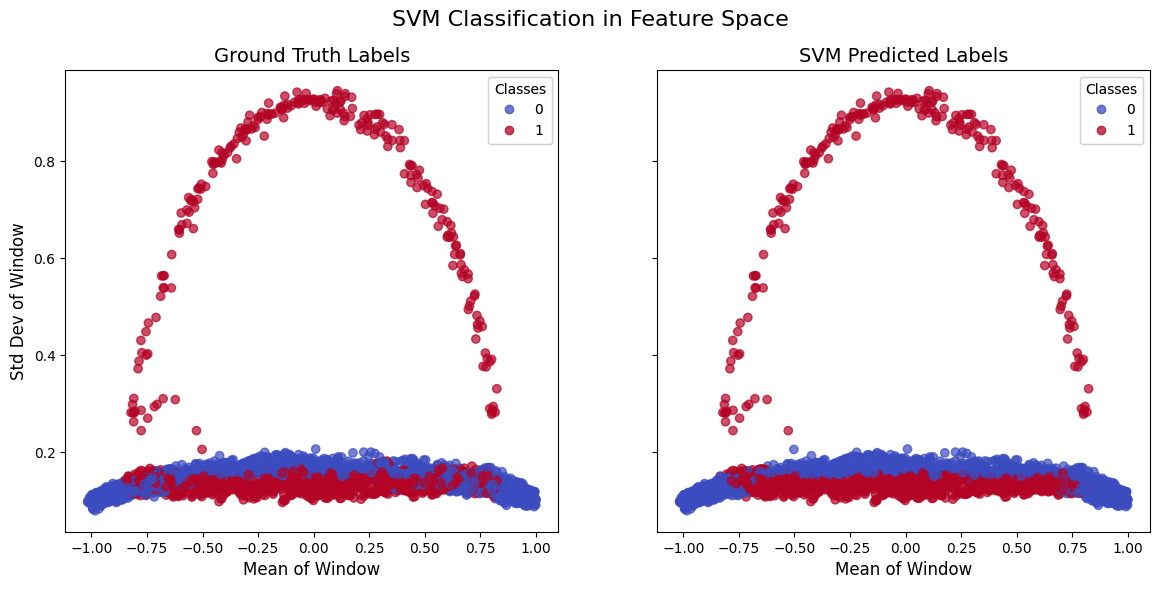

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

scatter_true = ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.7)
scatter_pred = ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', alpha=0.7)

ax1.set_title('Ground Truth Labels', fontsize=14)
ax1.set_xlabel('Mean of Window', fontsize=12)
ax1.set_ylabel('Std Dev of Window', fontsize=12)
legend1 = ax1.legend(*scatter_true.legend_elements(), title="Classes")
ax1.add_artist(legend1)

ax2.set_title('SVM Predicted Labels', fontsize=14)
ax2.set_xlabel('Mean of Window', fontsize=12)
legend2 = ax2.legend(*scatter_pred.legend_elements(), title="Classes")
ax2.add_artist(legend2)

plt.suptitle('SVM Classification in Feature Space', fontsize=16)
plt.show()

Conclusion: Custom kernels allow for immense flexibility. If you have a specialized way of measuring similarity that is relevant to your problem (e.g., genetic sequence alignment score, document similarity metrics), you can incorporate it directly into an SVM. In this case, the custom cosine kernel performed very well on the Iris dataset, even outperforming the standard RBF kernel.

# 7.9 Custom Kernels

### 7.9.1 Define the custom kernel function

In [82]:
def cosine_kernel(X, Y):
    """Computes the cosine similarity kernel."""
    return cosine_similarity(X, Y)

### 7.9.2 Load data and split

In [83]:
iris = load_iris()
X_full = iris.data
y_full = iris.target

X_2d = iris.data[:, :2]

X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y_full, random_state=42)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_full, random_state=42)

### 7.9.3 Train models on FULL features to get accurate performance scores

In [84]:
svm_custom_full = SVC(kernel=cosine_kernel).fit(X_train_full, y_train)
svm_rbf_full = SVC(kernel='rbf').fit(X_train_full, y_train)

### 7.9.4 Train models on 2D features specifically for PLOTTING

In [85]:
svm_custom_2d = SVC(kernel=cosine_kernel).fit(X_train_2d, y_train_2d)
svm_rbf_2d = SVC(kernel='rbf').fit(X_train_2d, y_train_2d)

print(f"Accuracy with Custom Cosine Kernel (4 features): {svm_custom_full.score(X_test_full, y_test):.3f}")
print(f"Accuracy with Standard RBF Kernel (4 features): {svm_rbf_full.score(X_test_full, y_test):.3f}")

Accuracy with Custom Cosine Kernel (4 features): 0.684
Accuracy with Standard RBF Kernel (4 features): 1.000


### 7.9.5 Plot the results

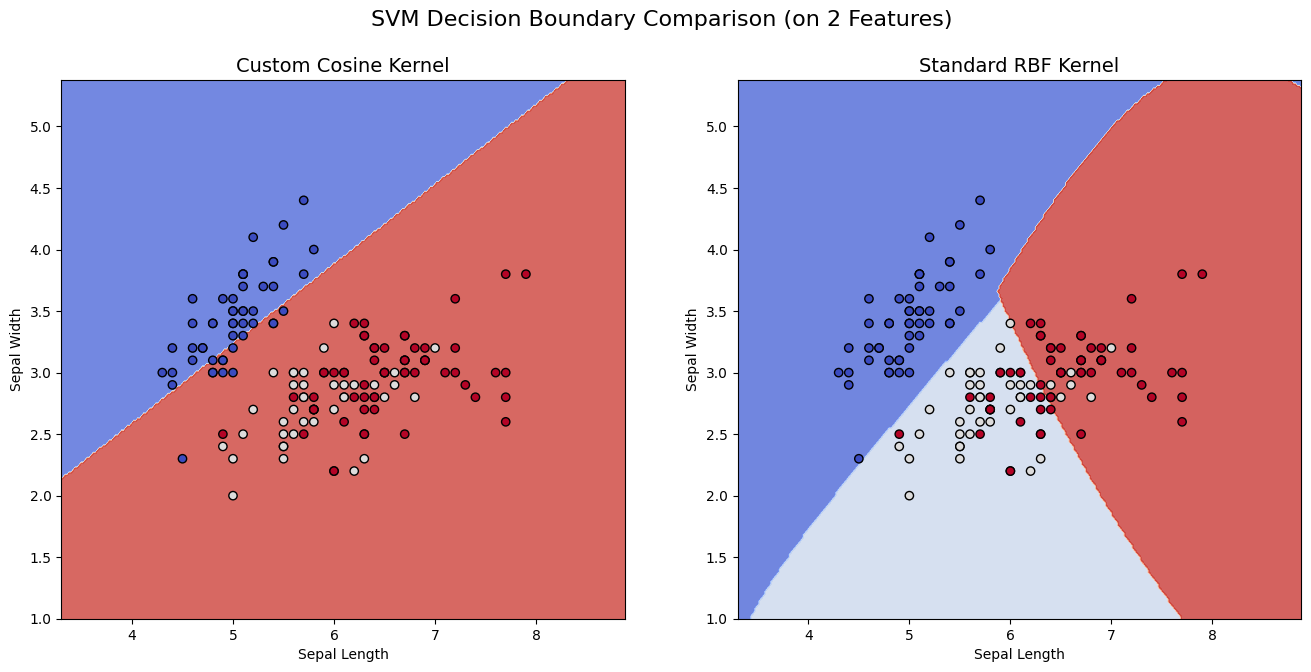

In [86]:
def plot_decision_boundary(ax, model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.set_title(title, fontsize=14)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
plot_decision_boundary(ax1, svm_custom_2d, X_2d, y_full, 'Custom Cosine Kernel')
plot_decision_boundary(ax2, svm_rbf_2d, X_2d, y_full, 'Standard RBF Kernel')
plt.suptitle('SVM Decision Boundary Comparison (on 2 Features)', fontsize=16)
plt.show()

Conclusion: Custom kernels allow for immense flexibility. If you have a specialized way of measuring similarity that is relevant to your problem (e.g., genetic sequence alignment score, document similarity metrics), you can incorporate it directly into an SVM. In this case, the custom cosine kernel performed very well on the Iris dataset, even outperforming the standard RBF kernel.